In [1]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [2]:
import os
if  not 'juxtorpus' in os.listdir():
    os.chdir('../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from juxtorpus.corpus.app import App
from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux

import warnings
warnings.filterwarnings('ignore')

# Juxtorpus
## Digital Humanities Day Demo

In [3]:
corpora = App()

# 1. Build a Corpus (Auspol Tweets dataset)

In [4]:
corpora.corpus_builder()

In [5]:
corpora.corpus_registry()

GridBox(children=(VBox(children=(HBox(children=(Label(value='Corpus ID', layout=Layout(display='flex', justify…

## Exploring the Corpus

In [53]:
corpus = corpora['auspol']
corpus.summary()

Corpus Type                                                      SpacyCorpus
Number of Documents                                                   100000
Number of Total Words                                                1471941
Size of Vocabulary                                                     40468
mean Words per Document                                                   14
min Words per Document                                                     0
max Words per Document                                                    58
metas                      lang, source, retweet_count, created_at, tweet...
dtype: object

In [54]:
corpus.meta

{'lang': <SeriesMeta [Id: lang dtype: category]>,
 'source': <SeriesMeta [Id: source dtype: category]>,
 'retweet_count': <SeriesMeta [Id: retweet_count dtype: Int64]>,
 'created_at': <SeriesMeta [Id: created_at dtype: datetime64[ns]]>,
 'tweet_type': <SeriesMeta [Id: tweet_type dtype: category]>}

### Corpus Timeline

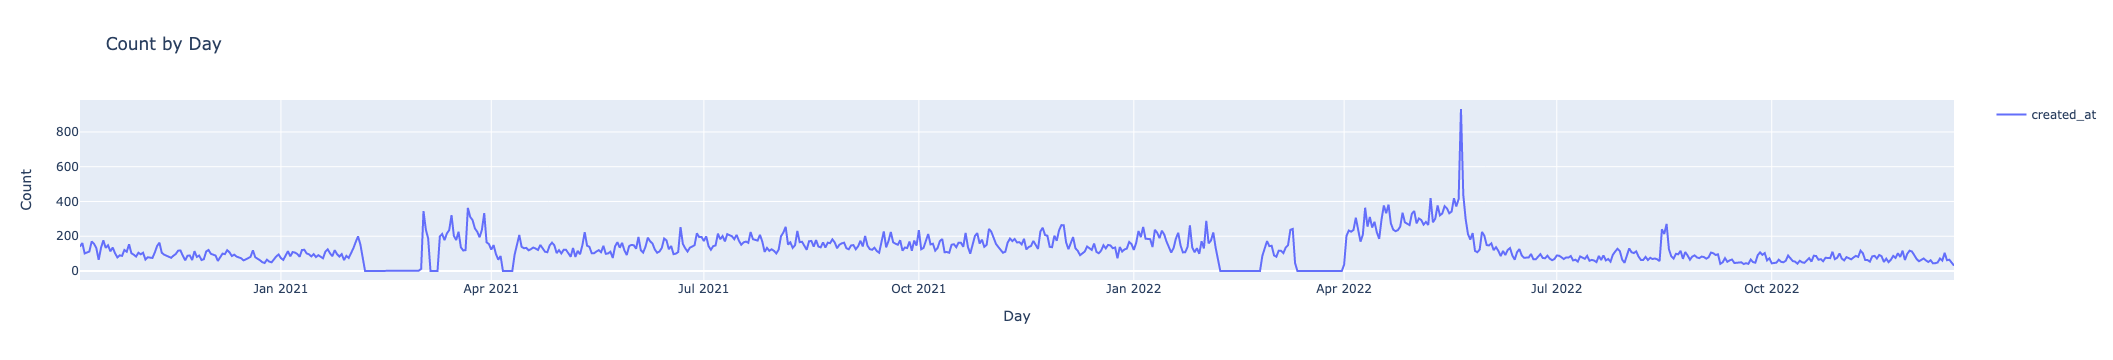

In [57]:
# FREQ = '1w'
# FREQ = '1m'
FREQ = '1d'
COL_TIME = 'created_at'
corpus.viz.timeline(COL_TIME, freq=FREQ)

### Corpus Wordcloud

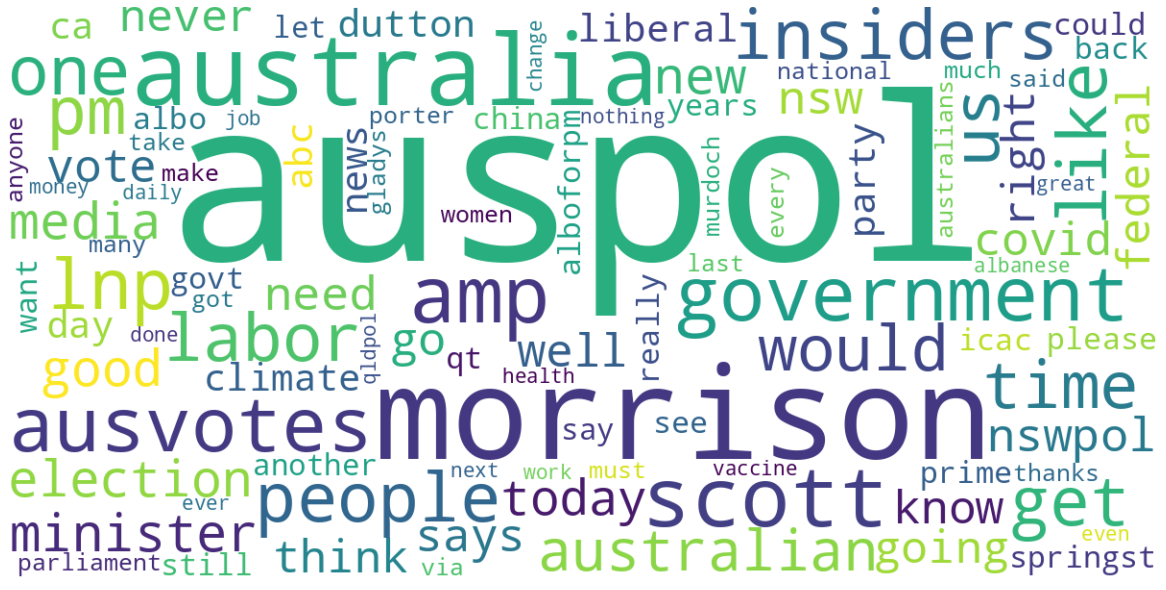

In [88]:
MAX_WORDS = 100
TYPE = 'word'
# TYPE = 'hashtag'
# TYPE = 'mention'
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

In [62]:
COL_TIME = 'created_at'
FREQ = '1w'

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]
corpus.create_custom_dtm(extract_hashtags)

item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, custom_dtm=True)
item_timeline.render()

FigureWidget({
    'data': [{'marker': {'color': 'rgba(76,238,0,1.0)'},
              'mode': 'lines+markers+t…

# ^ Hashtag Trend over Weeks

# Corpus Slicer - creating a subcorpus

In [6]:
corpora.corpus_slicer()

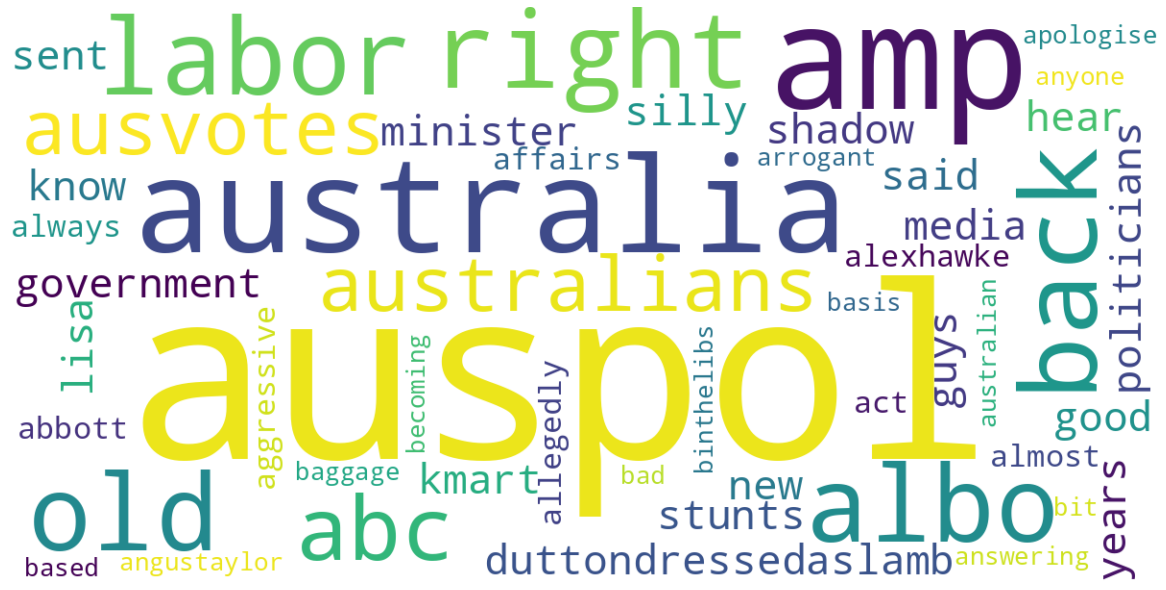

In [64]:
MAX_WORDS = 50
corpora['jun-orig-rt5+'].viz.wordcloud(max_words=MAX_WORDS)

## Topic Modelling - Add results to your corpus

In [65]:
NUM_TOPICS = 10
lda = LDA(corpora['auspol-en'], num_topics=NUM_TOPICS).build('tf')
lda.add_results_to_corpus()
lda.widget()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.010464 -0.061569       1        1  12.084969
0     -0.108530  0.001456       2        1  11.869136
7      0.038850 -0.085923       3        1  11.858592
5     -0.098136  0.064557       4        1  10.564897
8     -0.060802  0.026267       5        1   9.595745
3     -0.001892 -0.071689       6        1   9.268752
6      0.113019  0.195413       7        1   9.220596
1     -0.004407 -0.026139       8        1   9.016131
2     -0.029530  0.024511       9        1   8.692797
4      0.161892 -0.066884      10        1   7.828386, topic_info=           Term          Freq         Total Category  logprob  loglift
22866  morrison  12012.000000  12012.000000  Default  30.0000  30.0000
22392  minister   2194.000000   2194.000000  Default  29.0000  29.0000
31005     scott   4266.000000   4266.000000  Default  28.0000  28.0000
38332      vote   1611.000000   1611.000000  Default  27.0000  27.0000
27496     prime   1369.000000   1369.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
31633       see    192.021649   1317.768154  Topic10  -5.8965   0.6213
27046    porter    179.856902   1041.971992  Topic10  -5.9620   0.7907
39855     years    184.522473   1283.086974  Topic10  -5.9364   0.6082
1412    another    176.041532   1187.102655  Topic10  -5.9834   0.6389
19315      know    163.967682   1739.906021  Topic10  -6.0545   0.1855

[823 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
38         1  0.135649   abc
38         2  0.033206   abc
38         3  0.009891   abc
38         4  0.121518   abc
38         5  0.013424   abc
...      ...       ...   ...
39887      4  0.097701   yes
39887      5  0.690016   yes
39924     10  0.982422  york
40026      2  0.044939  zero
40026      6  0.951658  zero

[2427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 8, 6, 9, 4, 7, 2, 3, 5])

In [82]:
corpora.corpus_slicer()

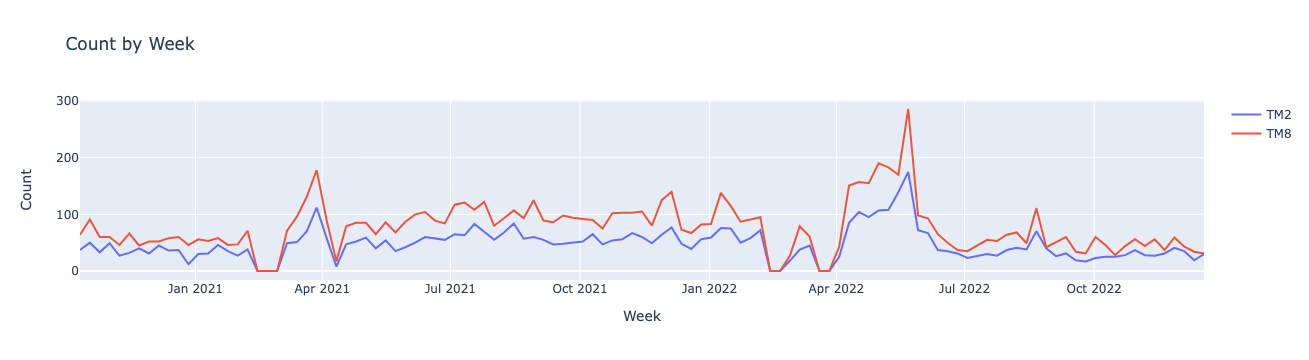

In [67]:
COL_TIME = 'created_at'
FREQ = '1w'
timelines(corpora, ['TM2', 'TM8'], COL_TIME, FREQ)

# Jux

In [68]:
corpora.corpus_registry()

GridBox(children=(VBox(children=(HBox(children=(Label(value='Corpus ID', layout=Layout(display='flex', justify…

## Normal Corpus Wordcloud - term frequency

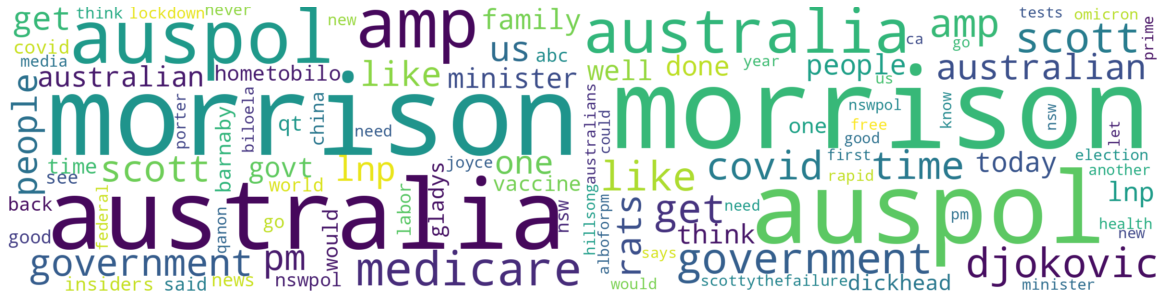

In [71]:
MAX_WORDS = 50
# METRIC = 'tf'
METRIC = 'tfidf'
wordclouds(corpora, ['jun21', 'jan22'], max_words=MAX_WORDS, metric=METRIC)

## Jux Polarity Wordcloud - term frequency

In [85]:
corpora['ju21'] = auspol.slicer.filter_by_datetime('created_at', start='01-06-2021', end='01-08-2021')
# corpora['2022'] = auspol.slicer.filter_by_datetime('created_at', start='01-01-2022', end='01-01-2023')

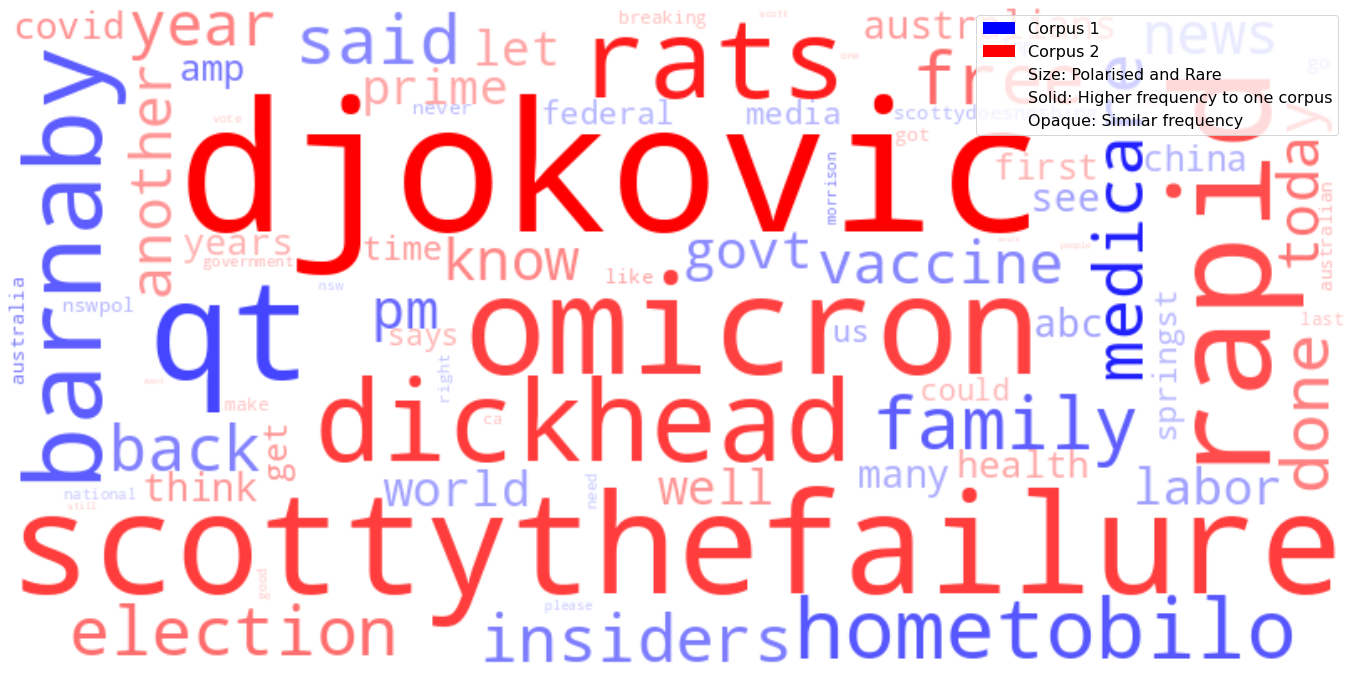

In [87]:
METRIC = 'tf'
# METRIC = 'tfidf'
# METRIC = 'log_likelihood'
TOP = 80
Jux(corpora['jun21'], corpora['jan22']).polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'))

### User defined tokenising function

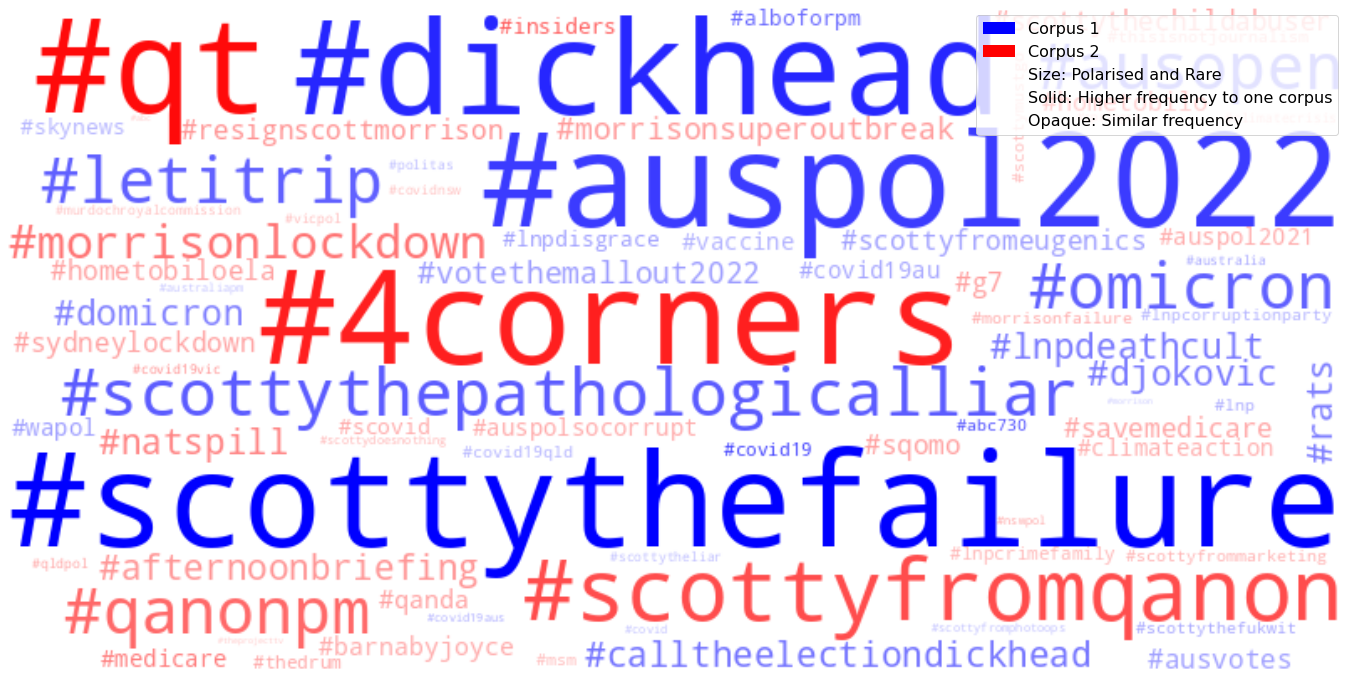

In [75]:
METRIC = 'tf'

# getting hashtags using a user defined function
Jux(corpora['jan22'], corpora['jun21']).\
    polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'), tokeniser_func=extract_hashtags)

In [77]:
auspol = corpora['auspol']
corpora['android'] = auspol.slicer.filter_by_item('source', 'Twitter for Android')
corpora['iphone'] = auspol.slicer.filter_by_item('source', 'Twitter for iPhone')
corpora['2021'] = auspol.slicer.filter_by_datetime('created_at', start='01-01-2021', end='01-01-2022')
corpora['2022'] = auspol.slicer.filter_by_datetime('created_at', start='01-01-2022', end='01-01-2023')

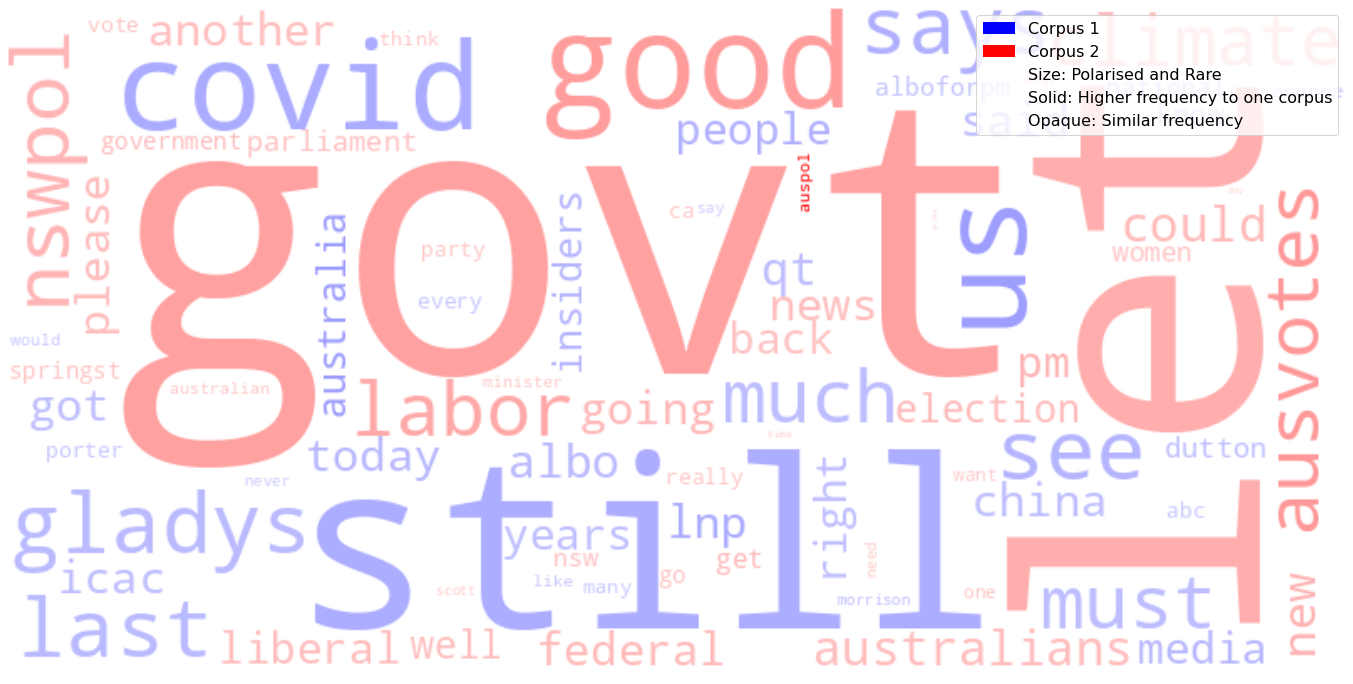

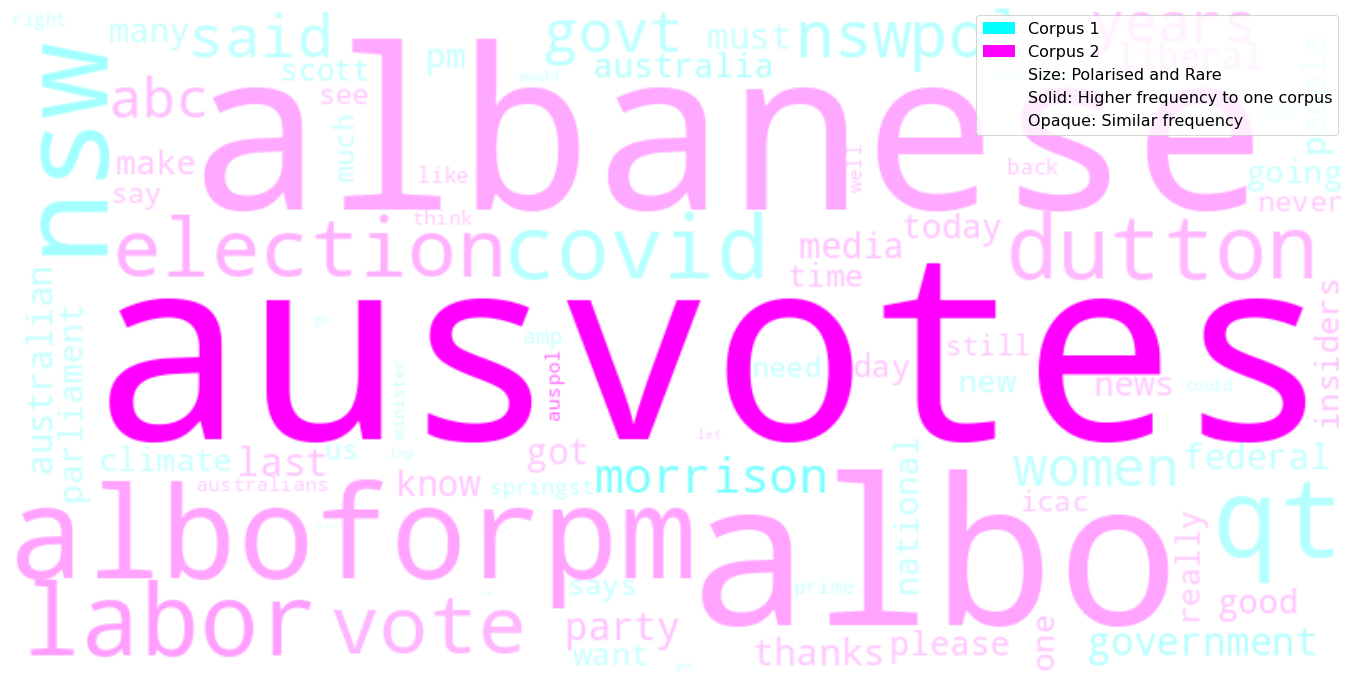

In [78]:
corpus_pairs = [
    ('android', 'iphone', ('blue', 'red')),
    ('2021', '2022', ('cyan', 'magenta')),
]

for pair in corpus_pairs:
    colours = pair[2]
    Jux(corpora[pair[0]], corpora[pair[1]]).polarity.wordcloud('tf', top=TOP, colours=colours)

# Keyword Analysis based on Log Likelihood

Future plans: using Log likelihood to analyse keywords (currently being integrated)


Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
https://ucrel.lancs.ac.uk/llwizard.html

In [79]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

jun_ft = corpora['jun21'].dtm.freq_table().series
jan_ft = corpora['jan22'].dtm.freq_table().series
df_ft = pd.concat([jun_ft.rename('jun21'), jan_ft.rename('jan22')], axis=1, join='outer').fillna(0)
colour = df_ft['jun21'] > df_ft['jan22']

In [80]:
llv = Jux(corpora['jun21'], corpora['jan22']) \
    .stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:30].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)

# Red - Overused in January Corpus, Blue - Overused in July Corpus

,log_likelihood_llv,bayes_factor_bic,effect_size_ell
djokovic,234.792316,222.925612,0.000369
rats,182.047775,170.181070,0.000293
qt,167.302889,155.436185,0.000301
scottythefailure,164.354621,152.487917,0.000280
omicron,160.647374,148.780670,0.000276
dickhead,158.999475,147.132771,0.000269
gladys,153.360982,141.494277,0.000282
rapid,147.054135,135.187431,0.000258
tests,110.575439,98.708735,0.000200
scottyfromqanon,106.887957,95.021253,0.000217


# Closing

+ Release is planned tentatively in **May**.
+ We will eventually integrate the ATAP tools together so you can easily access it under Corpus.
+ Stay tuned at https://www.atap.edu.au/
+ Feedback Survey at the end of the full workshop.
+ Questions - I'll be around or email me at huen.chan@sydney.edu.au